In [1]:
#Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
# Import of keras model and hidden layers for our convolutional network
from keras import Sequential
from keras.layers import InputLayer
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from google.colab.patches import cv2_imshow

Using TensorFlow backend.


In [2]:
#DOWNLOADING KAGGLE DATASET INTO COLAB
from google.colab import files
files.upload()

#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d evernext10/hand-gesture-of-the-colombian-sign-language

Saving kaggle.json to kaggle.json
100% 21.9G/21.9G [09:18<00:00, 40.1MB/s]
100% 21.9G/21.9G [09:18<00:00, 42.1MB/s]


In [46]:
from zipfile import ZipFile
file_name="hand-gesture-of-the-colombian-sign-language.zip"
with ZipFile(file_name,'r') as zip:
 list=zip.namelist()
 for i in range(len(list)):
   k=len(list[i])
   if k>34:
     zip.extract(list[i])

print("done")

done


In [47]:
#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('/content/dataset/dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if path.endswith("JPG"):
            imagepaths.append(path)
print(len(imagepaths))

3324


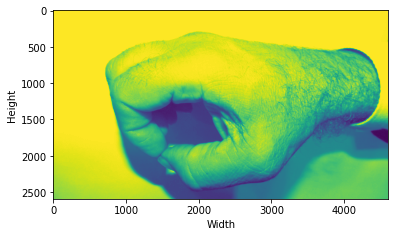

In [48]:
def img_plot(path):
  img=cv2.imread(path)
  #convert to RGB space
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(img_rgb)
  plt.xlabel("Width")
  plt.ylabel("Height")

img_plot(imagepaths[509])

#MODEL-1#


In [49]:
#### Creating Training Set and Labels ####
# X for image data
X = []
# y for the labels
y = []


#Load the images into X by doing the necessary conversions and resizing of images
#Resizing is done to reduce the size of image to increase the speed of training
for i in range(len(imagepaths)):
    path=imagepaths[i]
    img = cv2.imread(path)
    if type(img)==type(None):
      continue
    else:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
      img = cv2.resize(img, (128,128))
      X.append(img)  
      #Getting the labels from the image path
      y_lab=imagepaths[i][31]
      if y_lab=='0' or y_lab=='1' or y_lab=='2' or y_lab=='3' or y_lab=='4' or y_lab=='5':
        label=int(y_lab)
      elif y_lab=='A':
        label=6
      elif y_lab=='E':
        label=7
      elif y_lab=='I':
        label=8
      elif y_lab=='O':
        label=9
      else :
        label=10
      y.append(label)

#Turning X & y into numpy arrays
X = np.array(X)
X = X.reshape(len(X), 128,128,1)
y = np.array(y)

print(X.shape)
print(y.shape)


(3318, 128, 128, 1)
(3318,)


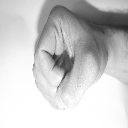

--------------------------------- 0 




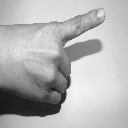

--------------------------------- 1 




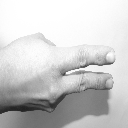

--------------------------------- 2 




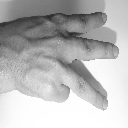

--------------------------------- 3 




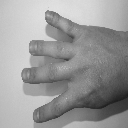

--------------------------------- 4 




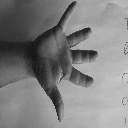

--------------------------------- 5 




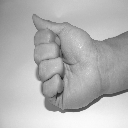

--------------------------------- A 




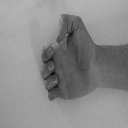

--------------------------------- E 




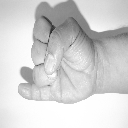

--------------------------------- I 




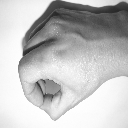

--------------------------------- O 




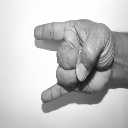

--------------------------------- U 




In [50]:
for i in range(11):
  for j in range(X.shape[0]):
    if y[j]==i:
      cv2_imshow(X[j])
      if y[j]==6:
        k='A'
      elif y[j]==7:
        k='E'
      elif y[j]==8:
        k='I'
      elif y[j]==9:
        k='O'
      elif y[j]==10:
        k='U'
      else:
        k=y[j]
      print("---------------------------------",k,"\n\n")
      break
    else:
      continue


In [90]:
# Make the test train split
threshold = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = threshold, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(2322, 128, 128, 1)
(2322,)


In [0]:
# Create a CNN Sequential Model
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)      

In [0]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [95]:
model.fit(X_train, y_train, epochs=16, batch_size=64, verbose=2,validation_data=(X_test, y_test))

Train on 2322 samples, validate on 996 samples
Epoch 1/16
 - 1s - loss: 0.0119 - accuracy: 0.9953 - val_loss: 2.1392 - val_accuracy: 0.7279
Epoch 2/16
 - 1s - loss: 0.0143 - accuracy: 0.9961 - val_loss: 2.4635 - val_accuracy: 0.7139
Epoch 3/16
 - 1s - loss: 0.0353 - accuracy: 0.9914 - val_loss: 2.3778 - val_accuracy: 0.7018
Epoch 4/16
 - 1s - loss: 0.0366 - accuracy: 0.9901 - val_loss: 2.9215 - val_accuracy: 0.7118
Epoch 5/16
 - 1s - loss: 0.0815 - accuracy: 0.9785 - val_loss: 2.9817 - val_accuracy: 0.6767
Epoch 6/16
 - 1s - loss: 0.0843 - accuracy: 0.9750 - val_loss: 2.0823 - val_accuracy: 0.7108
Epoch 7/16
 - 1s - loss: 0.0394 - accuracy: 0.9871 - val_loss: 2.3962 - val_accuracy: 0.7078
Epoch 8/16
 - 1s - loss: 0.0294 - accuracy: 0.9922 - val_loss: 2.4298 - val_accuracy: 0.7319
Epoch 9/16
 - 1s - loss: 0.0239 - accuracy: 0.9888 - val_loss: 2.2960 - val_accuracy: 0.7229
Epoch 10/16
 - 1s - loss: 0.0209 - accuracy: 0.9935 - val_loss: 2.2742 - val_accuracy: 0.7219
Epoch 11/16
 - 1s - lo

In [96]:
#calculate loss and accuracy on test data

tLoss, tAccuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(tAccuracy*100))

996/996 [==============================] - 0s 186us/step
Test accuracy: 73.09%


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/gesture_detection/DATA2_mod1.h5')

In [0]:
y_pred=np.argmax(model.predict(X_test),axis=1) # Make predictions towards the test set

In [99]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["0","1","2","3","4","5","A","E","I","O","U"],
             index=["0","1","2","3","4","5","A","E","I","O","U"])

,0,1,2,3,4,5,A,E,I,O,U
0,48,0,0,0,0,0,2,2,2,30,0
1,1,80,7,3,2,1,1,0,3,0,1
2,0,13,58,8,5,0,2,0,2,0,3
3,1,4,18,57,14,0,3,0,1,1,2
4,0,2,3,15,59,10,0,0,0,0,2
5,0,0,0,4,5,83,2,0,0,0,0
A,4,0,0,0,1,1,81,2,2,1,0
E,3,0,0,0,0,1,8,69,2,3,0
I,0,4,0,0,1,0,4,1,73,1,5
O,23,0,0,0,0,0,5,3,2,51,0


#MODEL-2 FINE TUNINNG VGG-16#

In [61]:
#### Creating Training Set and Labels ####
# X for image data
X1 = []
# y for the labels
y1 = []
#Load the images into X by doing the necessary conversions and resizing of images
#Resizing is done to reduce the size of image to increase the speed of training
for i in range(len(imagepaths)):
    path=imagepaths[i]
    img = cv2.imread(path)
    if type(img)==type(None):
      continue
    else:
      img = cv2.resize(img, (224,224))
      X1.append(img)  
      #Getting the labels from the image path
      y_lab=imagepaths[i][31]
      if y_lab=='0' or y_lab=='1' or y_lab=='2' or y_lab=='3' or y_lab=='4' or y_lab=='5':
        label=int(y_lab)
      elif y_lab=='A':
        label=6
      elif y_lab=='E':
        label=7
      elif y_lab=='I':
        label=8
      elif y_lab=='O':
        label=9
      else :
        label=10
      y1.append(label)

#Turning X & y into numpy arrays
X1 = np.array(X1)
X1 = X1.reshape(len(X1), 224,224,3)
y1 = np.array(y1)

print(X1.shape)
print(y1.shape)


(3318, 224, 224, 3)
(3318,)


In [100]:
# Make the test train split
threshold = 0.3

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = threshold, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(2322, 224, 224, 3)
(2322,)


In [63]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 9s 0us/step


In [101]:
vgg16_model.summary()
print(len(vgg16_model.layers))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [102]:
model = tf.keras.Sequential()
l=len(vgg16_model.layers)-1
for i in range(l):
    layer=vgg16_model.layers[i]
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(tf.keras.layers.Dense(11, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=2,validation_data=(X_test, y_test))

Epoch 1/25
37/37 - 8s - loss: 1.9233 - accuracy: 0.3816 - val_loss: 1.3700 - val_accuracy: 0.5201
Epoch 2/25
37/37 - 7s - loss: 1.0434 - accuracy: 0.6283 - val_loss: 1.1601 - val_accuracy: 0.5904
Epoch 3/25
37/37 - 7s - loss: 0.7884 - accuracy: 0.7339 - val_loss: 1.0297 - val_accuracy: 0.6335
Epoch 4/25
37/37 - 7s - loss: 0.7011 - accuracy: 0.7545 - val_loss: 1.0576 - val_accuracy: 0.6255
Epoch 5/25
37/37 - 7s - loss: 0.5691 - accuracy: 0.8140 - val_loss: 0.9729 - val_accuracy: 0.6355
Epoch 6/25
37/37 - 7s - loss: 0.4873 - accuracy: 0.8506 - val_loss: 0.9519 - val_accuracy: 0.6697
Epoch 7/25
37/37 - 7s - loss: 0.4313 - accuracy: 0.8760 - val_loss: 0.9728 - val_accuracy: 0.6797
Epoch 8/25
37/37 - 8s - loss: 0.3814 - accuracy: 0.8936 - val_loss: 0.9366 - val_accuracy: 0.6667
Epoch 9/25
37/37 - 7s - loss: 0.3335 - accuracy: 0.9126 - val_loss: 0.9247 - val_accuracy: 0.6687
Epoch 10/25
37/37 - 7s - loss: 0.3006 - accuracy: 0.9302 - val_loss: 0.9455 - val_accuracy: 0.6586
Epoch 11/25
37/37 -

In [105]:
#calculate loss and accuracy on test data

tLoss, tAccuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(tAccuracy*100))

32/32 [==============================] - 2s 74ms/step - loss: 0.9604 - accuracy: 0.6918
Test accuracy: 69.18%


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/gesture_detection/DATA2_mod2.h5')

In [0]:
y_pred=np.argmax(model.predict(X_test),axis=1) # Make predictions towards the test set

In [108]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["0","1","2","3","4","5","A","E","I","O","U"],
             index=["0","1","2","3","4","5","A","E","I","O","U"])

,0,1,2,3,4,5,A,E,I,O,U
0,52,1,0,1,0,1,2,0,1,26,0
1,1,85,8,4,0,0,0,0,0,1,0
2,1,12,52,18,2,0,1,0,0,0,5
3,1,3,13,58,17,3,1,0,0,0,5
4,0,0,3,21,46,17,1,0,0,0,3
5,0,0,0,2,8,83,0,0,0,0,1
A,3,2,0,1,0,4,76,1,4,0,1
E,5,1,0,1,0,2,4,71,1,0,1
I,4,2,0,3,2,0,4,5,50,1,18
O,39,3,0,0,0,0,0,0,1,40,1
